In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency

df=pd.read_csv('amazon_database.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [185]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [186]:
df.shape

(2443651, 9)

In [187]:
pd.set_option('display.max_columns', None)

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [188]:
cross=pd.crosstab(df['category'],df['isBestSeller'])

In [189]:
df_2=df[df.isBestSeller==True]
df_2.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
15,16,B09B97BPSW,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
17,18,B09B8XRZYB,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
36,37,B08L84ST93,Bose Solo Soundbar Series II - TV Speaker with...,4.6,2799,169.00,True,0,Hi-Fi Speakers
55,56,B08CMJ2YZX,"Sanyun SW208 3"" Active Bluetooth 5.0 Bookshelf...",4.4,974,59.49,True,0,Hi-Fi Speakers


In [190]:
cross_2=pd.crosstab(df_2['category'],df_2['isBestSeller'])
cross_2.sort_values(by=True,ascending=False)

isBestSeller,True
category,
Grocery,556
Health & Personal Care,552
Baby,341
Sports & Outdoors,330
Power & Hand Tools,306
...,...
"Motorbike Handlebars, Controls & Grips",1
I/O Port Cards,1
Smart Speakers,1


This crosstabs gives us how many best sellers per category, Cross_2 was a failed attempt to filter only the ones that actually have a best seller between them, Cramer and Chi gives us no relations because after filtering I deleted the datas that would create the relations

In [191]:
cross=cross.sort_values(by=True,ascending=False)

cross=cross[cross["False"]!=835935]
#This doesnt work and i dont know why
cross=cross[cross["isBestSeller"]!='Sports & Outdoors']


In [192]:
cross=cross[cross[False]!=835935]

We organize it and find that Grocery and Health & Personal Care are the ones with most best sellers out of all of the categories, we find also that Sports and Outdoors are the ones that have the most number of books. There is also a relation to book published and big hits as it should be normal.

In [193]:
estadistico, p_valor, ex, ddof = chi2_contingency(cross)

estadistico, p_valor

(22897.513398048344, 0.0)

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

In [194]:
association(cross,method='cramer')


0.11935320075915178

In [195]:
cross

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Power & Hand Tools,8353,306
Beauty,19010,302
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


<function matplotlib.pyplot.show(close=None, block=None)>

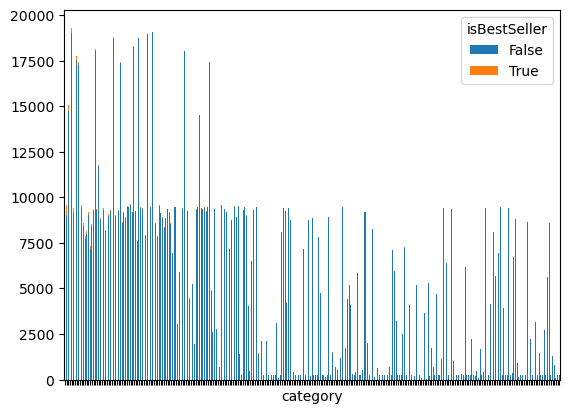

In [196]:
cross.plot(kind='bar',stacked=True)
plt.xticks(visible=False)
plt.show

Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

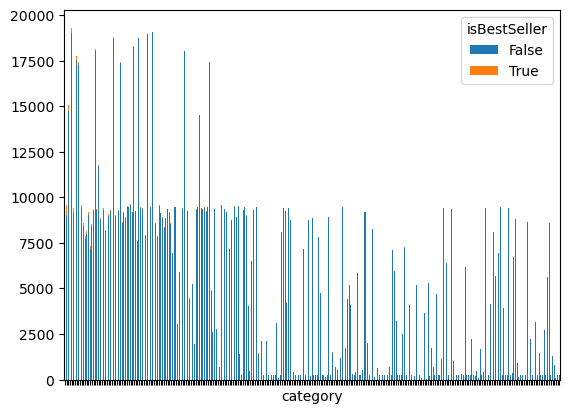

In [197]:
cross.plot(kind='bar', stacked=True)
plt.xticks(visible=False)
plt.show()

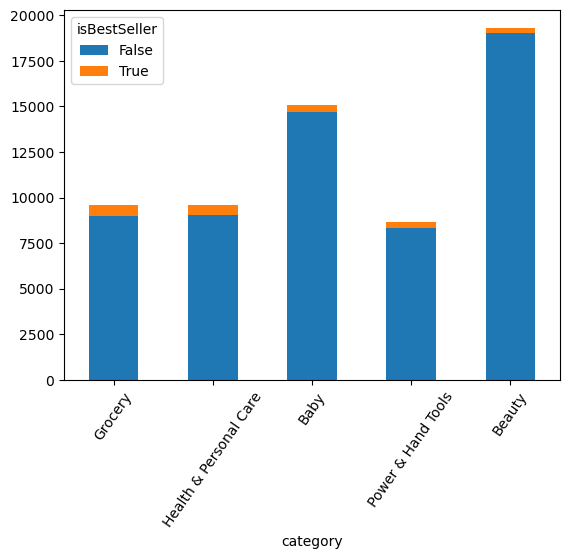

In [198]:
cross.head().plot(kind='bar', stacked=True)
plt.xticks(visible=True,rotation=55)
plt.show()

Then we get the total that shows actually no relationship whatsoever between one category and best sellers

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [199]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    #  outliers = [(data < lower_bound) | (data > upper_bound)]

    
    return outliers

In [200]:
df_outliers=tukeys_test_outliers(df['price'])

In [201]:
df_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
10,11,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,20,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
25,26,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,29,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443627,2828568,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,2828579,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

In [202]:
# df_3=df.drop[df.index !=df_outliers, index=0]
df_3 = df.drop(df_outliers.index, axis=0)


df_3 is now the original data without the outliers.

In [203]:
df_3.category.unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Skiing Poles', 'Downhill Ski Boots', 'Hiking Hand & Foot Warmer

In [204]:
cross_3=pd.crosstab(df_3['category'],df_3['price'])

In [205]:
cross_3.T

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,Baby & Toddler Toys,Bakeware,Ballet & Dancing Footwear,Barebone PCs,Basketball Footwear,Bass Guitars & Gear,Bath & Body,Bathroom Furniture,Bathroom Lighting,Bathroom Linen,Beauty,Bedding & Linen,Bedding Accessories,Bedding Collections,Bedroom Furniture,"Beer, Wine & Spirits","Billiard, Snooker & Pool","Binoculars, Telescopes & Optics",Bird & Wildlife Care,Birthday Gifts,Blank Media Cases & Wallets,Boating Footwear,Bowling,Boxes & Organisers,Boxing Shoes,Boys,Building & Construction Toys,Building Supplies,"CD, Disc & Tape Players",CPUs,Cables & Accessories,Calendars & Personal Organisers,Camcorders,Camera & Photo Accessories,Cameras,Candles & Holders,Car & Motorbike,Car & Vehicle Electronics,Children's Bedding,Climbing Footwear,Clocks,Coffee & Espresso Machines,"Coffee, Tea & Espresso",Computer & Server Racks,Computer Audio & Video Accessories,Computer Cases,Computer Memory,Computer Memory Card Accessories,Computer Printers,Computer Screws,"Computers, Components & Accessories",Construction Machinery,Cookware,Cricket Shoes,Curtain & Blind Accessories,Cushions & Accessories,Customers' Most Loved,Cutting Tools,Cycling Shoes,DJ & VJ Equipment,Darts & Dartboards,Data Storage,Decking & Fencing,Decorative Artificial Flora,Decorative Home Accessories,Desktop PCs,Digital Cameras,Digital Frames,Dining Room Furniture,Dolls & Accessories,Doormats,Downhill Ski Boots,Downhill Skis,Drums & Percussion,Electrical,Electrical Power Accessories,Electronic Toys,Equestrian Sports Boots,External Optical Drives,External Sound Cards,External TV Tuners & Video Capture Cards,Film Cameras,"Fireplaces, Stoves & Accessories",Flashes,Fragrances,Furniture & Lighting,"GPS, Finders & Accessories",Games & Game Accessories,Garden Décor,Garden Furniture & Accessories,Garden Storage & Housing,Garden Tools & Watering Equipment,Gardening,General Music-Making Accessories,Gifts for Her,Gifts for Him,Girls,Golf Shoes,Graphics Cards,Grocery,Guitars & Gear,Hair Care,Hallway Furniture,Handmade,Handmade Artwork,Handmade Baby Products,"Handmade Clothing, Shoes & Accessories",Handmade Gifts,Handmade Home & Kitchen Products,Handmade Home Décor,Handmade Jewellery,Handmade Kitchen & Dining,Hard Drive Accessories,Hardware,Headphones & Earphones,"Headphones, Earphones & Accessories",Health & Personal Care,"Heating, Cooling & Air Quality",Hi-Fi & Home Audio Accessories,Hi-Fi Receivers & Separates,Hi-Fi Speakers,Hiking Hand & Foot Warmers,Hobbies,Hockey Shoes,Home Audio Record Players,Home Bar Furniture,Home Brewing & Wine Making,"Home Cinema, TV & Video",Home Entertainment,Home Entertainment Furniture,Home Fragrance,Home Office Furniture,"Household Batteries, Chargers & Accessories","Hydraulics, Pneumatics & Plumbing",I/O Port Cards,Indoor Lighting,Industrial Electrical,"Inflatable Beds, Pillows & Accessories",Internal Optical Drives,Internal TV Tuner & Video Capture Cards,Ironing & Steamers,Jigsaws & Puzzles,KVM Switches,Karaoke Equipment,"Keyboards, Mice & Input Devices",Kids' Art & Craft Supplies,Kids' Dress Up & Pretend Play,Kids' Play Figures,Kids' Play Vehicles,Kitchen & Bath Fixtures,Kitchen Linen,Kitchen Storage & Organisation,Kitchen Tools & Gadgets,Lab & Scientific Products,Laptop Accessories,Laptops,Large Appliances,Learning & Education Toys,Lenses,Light Bulbs,Lighting,Lights and switches,Living Room Furniture,Luggage and travel gear,Luxury Food & Drink,Made in Italy Handmade,Make-up,Manicure & Pedicure Products,Material Handling Products,Mattress Pads & Toppers,Media Streaming Devices,Men,Men's Sports & Outdoor Shoes,Microphones,Mirrors,Mobile Phone Accessories,Mobile Phones & Communication,Mobile Phones & Smartphones,Monitor Accessories,Monitors,Motherboards,Motorbike Accessories,Motorbike Batteries,Motorbike Boots & Luggage,Motorbike Brakes,Motorbike Chassis,Motorbike Clothing

In [206]:
df_3

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


df_gr=df_3['category','price'].value_counts().reset_index().head(5)
df_gr

In [207]:
df_gr = df_3.groupby(['category', 'price']).size().reset_index(name='count').sort_values(by='count', ascending=False)

In [208]:
top = df_3['category'].value_counts().head(5)
filtered_df = df_3[df_3['category'].isin(top.index)]

In [209]:
top

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Name: count, dtype: int64

In [210]:
filtered_df.category.unique()

array(['Sports & Outdoors', 'Bath & Body', 'Manicure & Pedicure Products',
       'Beauty', 'Handmade Clothing, Shoes & Accessories'], dtype=object)

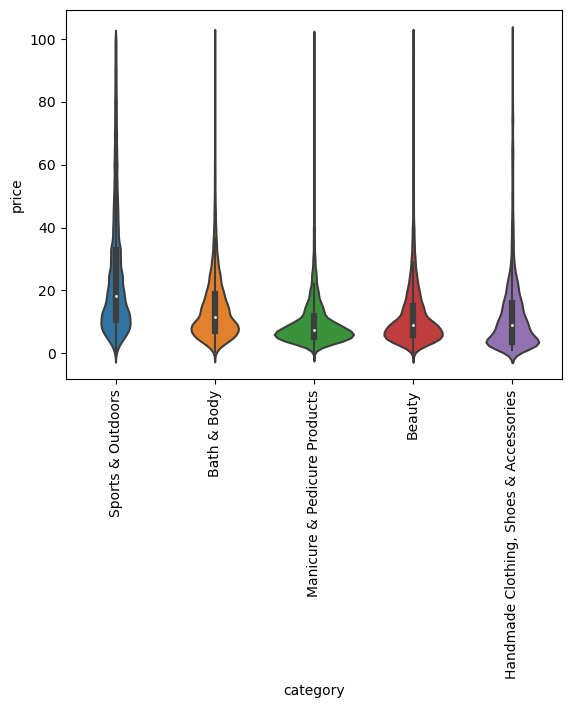

In [211]:
sns.violinplot(data=filtered_df,x='category', y='price')
plt.xticks(rotation=90)
plt.show()

Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [224]:
Ex_2= df_3.groupby('category').agg({"price":"mean"}).sort_values(by='price',ascending=False).head(10)
df_5=Ex_2
df_5=df_5.reset_index()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Motherboards'),
  Text(1, 0, 'Boxing Shoes'),
  Text(2, 0, 'Desktop PCs'),
  Text(3, 0, 'Tablets'),
  Text(4, 0, 'Graphics Cards'),
  Text(5, 0, 'Digital Frames'),
  Text(6, 0, 'Streaming Clients'),
  Text(7, 0, 'Hockey Shoes'),
  Text(8, 0, 'Computer Cases'),
  Text(9, 0, 'Skiing Poles')])

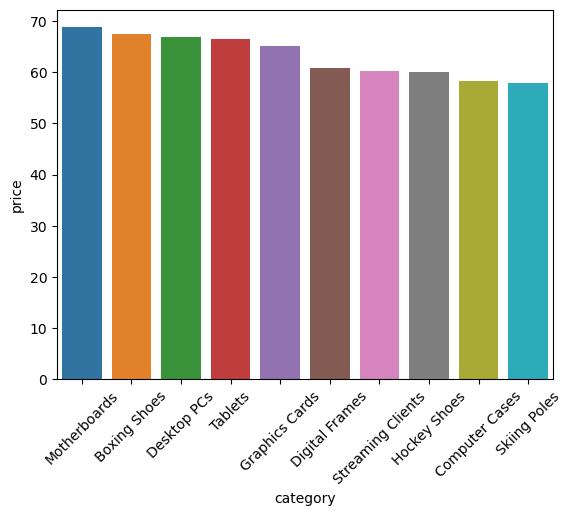

In [225]:
sns.barplot(data=df_5, x= 'category',y='price')
plt.xticks(rotation=45)

Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [226]:
df_5 = df_3[df_3['stars']>0.5]

In [253]:
df_box=df_5.groupby('category')['stars'].value_counts().reset_index()
df_box

,category,stars,count
0,3D Printers,4.3,5
1,3D Printers,4.6,3
2,3D Printers,4.5,3
3,3D Printers,4.1,2
4,3D Printers,4.2,2
...,...,...,...
8221,eBook Readers & Accessories,1.0,1
8222,eBook Readers & Accessories,2.8,1
8223,eBook Readers & Accessories,3.4,1
8224,eBook Readers & Accessories,3.6,1


In [215]:
stars=df_5[df_5["stars"] > 0.5]

In [216]:
df_6

,category,stars
0,Luxury Food & Drink,5.0
1,Grocery,4.0
2,Laptop Accessories,4.0
3,Health & Personal Care,4.0
4,Arts & Crafts,4.0
5,Office Paper Products,4.0
6,Customers' Most Loved,4.0
7,"Water Coolers, Filters & Cartridges",4.0
8,USB Hubs,4.0
9,Power & Hand Tools,4.0


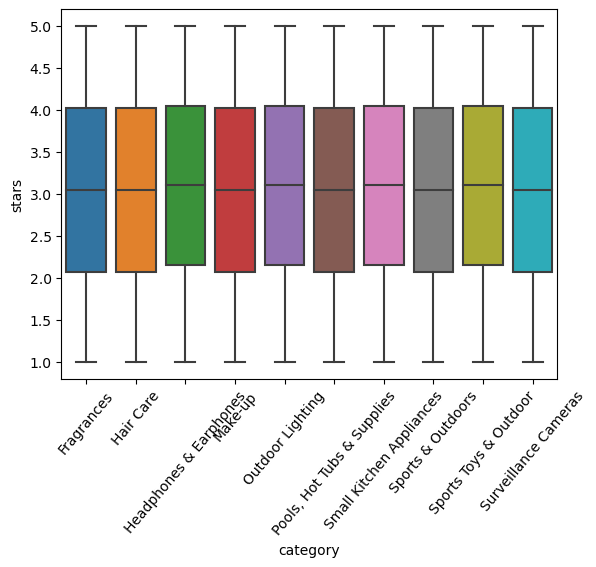

In [257]:

category_counts = df_box['category'].value_counts()


top_categories = category_counts.head(10).index


df_filtered = df_box[df_box['category'].isin(top_categories)]

sns.boxplot(data=df_filtered, x='category', y='stars')
plt.xticks(rotation=50)
plt.show()